# MR課題
> 一部、加工したファイル(`レポート用アンケート調査 copy.xlsx`)を利用する

In [18]:
from sklearn import linear_model
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import japanize_matplotlib

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer


## データの読み込みと可視化

In [2]:
input_path  = "レポート用アンケート調査 copy.xlsx"
df = pd.read_excel(input_path, sheet_name="データシート")

In [3]:
df.head()

,No,性別,シャープ_信頼できる,シャープ_親しみやすい,シャープ_個性的である,シャープ_洗練されてる,シャープ_都会的である,シャープ_先進性がある,シャープ_性能が優れている,シャープ_デザインが良い,...,生活全般について_友人たちと何かをするときは，誘うことより誘われることの方が多い,生活全般について_人に助言するのは得意なほうではないと思う,生活全般について_自分は熱しやすく冷めやすいタイプだと思う,生活全般について_多くの人が訪れる話題のスポットなどへ出かけるのが好きだ,生活全般について_刺激的だがリスクがある生活よりも，リスクの少ない安定した生活を送りたいと思う,生活全般について_他人と争ってでも自己主張するより，自己主張せずに周囲とのトラブルを避けたい,生活全般について_余暇時間を大事にし，充実させたいと強く思う,生活全般について_仕事が生きがいで，仕事中心に生活したいと思う,生活全般について_自分が周囲からどのように思われるかが気になる,生活全般について_周囲から一目置かれたいと思う
0,1,男性,1,2,2,2,1,1,1,2,...,2,1,1,2,2,2,2,1,2,2
1,2,男性,4,4,4,4,4,4,4,4,...,5,5,4,4,2,2,5,5,5,4
2,3,男性,4,4,2,3,3,2,3,2,...,4,3,5,2,3,2,4,4,4,4
3,4,男性,5,5,4,5,3,5,5,5,...,4,2,4,1,4,4,5,2,4,5
4,5,男性,3,2,1,3,2,2,3,3,...,1,3,2,2,2,3,1,3,2,3


In [4]:
# 「性別」列をbool型に変換（男性:True, 女性:False と仮定）
df["性別"] = df["性別"].map({"男性": True, "女性": False})


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 91 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   No                                               52 non-null     int64  
 1   性別                                               52 non-null     bool   
 2   シャープ_信頼できる                                       52 non-null     int64  
 3   シャープ_親しみやすい                                      52 non-null     int64  
 4   シャープ_個性的である                                      52 non-null     int64  
 5   シャープ_洗練されてる                                      52 non-null     int64  
 6   シャープ_都会的である                                      52 non-null     int64  
 7   シャープ_先進性がある                                      52 non-null     int64  
 8   シャープ_性能が優れている                                    52 non-null     int64  
 9   シャープ_デザインが良い                      

In [6]:
comp_names = ["シャープ", "ソニー ","パナソニック","日立", "東芝", "三菱電機"]
for comp_name in comp_names:
    comp_cols = [col for col in df.columns if col.startswith(f"{comp_name}_")]
    comp_data = df[comp_cols]
    #display(comp_data.head())
    comp_means = comp_data.mean()
    #print(comp_means)
    plt.figure(figsize=(10, 6))
    comp_means.plot(kind='bar')
    plt.title(f"ブランド『{comp_name}』に対する平均イメージ評価")
    plt.ylim(2.5,4.5)
    plt.ylabel("平均スコア")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.savefig(f"output/comp_eval_means_bar_graph/comp_means_{comp_name}.png")
    plt.close()

In [7]:
df.head()

,No,性別,シャープ_信頼できる,シャープ_親しみやすい,シャープ_個性的である,シャープ_洗練されてる,シャープ_都会的である,シャープ_先進性がある,シャープ_性能が優れている,シャープ_デザインが良い,...,生活全般について_友人たちと何かをするときは，誘うことより誘われることの方が多い,生活全般について_人に助言するのは得意なほうではないと思う,生活全般について_自分は熱しやすく冷めやすいタイプだと思う,生活全般について_多くの人が訪れる話題のスポットなどへ出かけるのが好きだ,生活全般について_刺激的だがリスクがある生活よりも，リスクの少ない安定した生活を送りたいと思う,生活全般について_他人と争ってでも自己主張するより，自己主張せずに周囲とのトラブルを避けたい,生活全般について_余暇時間を大事にし，充実させたいと強く思う,生活全般について_仕事が生きがいで，仕事中心に生活したいと思う,生活全般について_自分が周囲からどのように思われるかが気になる,生活全般について_周囲から一目置かれたいと思う
0,1,True,1,2,2,2,1,1,1,2,...,2,1,1,2,2,2,2,1,2,2
1,2,True,4,4,4,4,4,4,4,4,...,5,5,4,4,2,2,5,5,5,4
2,3,True,4,4,2,3,3,2,3,2,...,4,3,5,2,3,2,4,4,4,4
3,4,True,5,5,4,5,3,5,5,5,...,4,2,4,1,4,4,5,2,4,5
4,5,True,3,2,1,3,2,2,3,3,...,1,3,2,2,2,3,1,3,2,3


In [8]:
# 男性と女性で各ブランドの平均イメージ評価の違いを可視化する

import matplotlib.pyplot as plt

comp_names = ["シャープ", "ソニー ","パナソニック","日立", "東芝", "三菱電機"]

for comp_name in comp_names:
    comp_cols = [col for col in df.columns if col.startswith(f"{comp_name}_")]
    if not comp_cols:
        continue
    # 男性・女性ごとに平均を計算
    male_means = df[df["性別"] == True][comp_cols].mean()
    female_means = df[df["性別"] == False][comp_cols].mean()
    x = range(len(comp_cols))
    plt.figure(figsize=(10, 6))
    plt.bar(x, male_means, width=0.4, label="男性", align='center', alpha=0.7)
    plt.bar([i + 0.4 for i in x], female_means, width=0.4, label="女性", align='center', alpha=0.7)
    plt.xticks([i + 0.2 for i in x], [col.replace(f"{comp_name}_", "") for col in comp_cols], rotation=45, ha="right")
    plt.title(f"ブランド『{comp_name}』に対する男女別平均イメージ評価")
    plt.ylabel("平均スコア")
    plt.ylim(2.5, 4.5)
    plt.legend()
    plt.tight_layout()
    plt.savefig(f"output/comp_eval_means_gender/comp_means_gender_{comp_name}.png")
    #plt.show()
    plt.close()


['シャープ_信頼できる', 'シャープ_親しみやすい', 'シャープ_個性的である', 'シャープ_洗練されてる', 'シャープ_都会的である', 'シャープ_先進性がある', 'シャープ_性能が優れている', 'シャープ_デザインが良い', 'シャープ_品質が良い', 'シャープ_シンプルである', 'ソニー _信頼できる', 'ソニー _親しみやすい', 'ソニー _個性的である', 'ソニー _洗練されてる', 'ソニー _都会的である', 'ソニー _先進性がある', 'ソニー _性能が優れている', 'ソニー _デザインが良い', 'ソニー _品質が良い', 'ソニー _シンプルである', 'パナソニック_信頼できる', 'パナソニック_親しみやすい', 'パナソニック_個性的である', 'パナソニック_洗練されてる', 'パナソニック_都会的である', 'パナソニック_先進性がある', 'パナソニック_性能が優れている', 'パナソニック_デザインが良い', 'パナソニック_品質が良い', 'パナソニック_シンプルである', '日立_信頼できる', '日立_親しみやすい', '日立_個性的である', '日立_洗練されてる', '日立_都会的である', '日立_先進性がある', '日立_性能が優れている', '日立_デザインが良い', '日立_品質が良い', '日立_シンプルである', '東芝_信頼できる', '東芝_親しみやすい', '東芝_個性的である', '東芝_洗練されてる', '東芝_都会的である', '東芝_先進性がある', '東芝_性能が優れている', '東芝_デザインが良い', '東芝_品質が良い', '東芝_シンプルである', '三菱電機_信頼できる', '三菱電機_親しみやすい', '三菱電機_個性的である', '三菱電機_洗練されてる', '三菱電機_都会的である', '三菱電機_先進性がある', '三菱電機_性能が優れている', '三菱電機_デザインが良い', '三菱電機_品質が良い', '三菱電機_シンプルである', '三菱電機_']
    Brand       PC1       PC2
0    シャープ  0.130583 -0.073248
1    ソニー   0.138015 -0.116138
2  パナソニッ

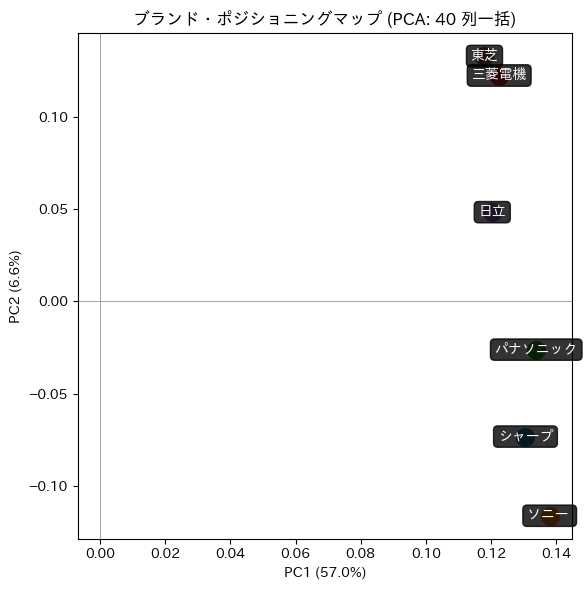

In [25]:
brand_cols = [c for c in df.columns if ("_" in c) and ("について" not in c)]
print(brand_cols)
brand_attr = df[brand_cols].dropna(axis=1, how="all")   # 全欠損(三菱電機)除き40列

brand_attr.columns = pd.MultiIndex.from_tuples(
    [c.split("_") for c in brand_attr.columns],
    names=["Brand", "Attribute"]
)

pipe = make_pipeline(
    SimpleImputer(strategy="mean"),
    StandardScaler(),
    PCA(n_components=2, random_state=0)
)
pipe.fit(brand_attr.values)
pca = pipe.named_steps["pca"]

loadings = pd.DataFrame(pca.components_.T,
                        index=brand_attr.columns,
                        columns=["PC1", "PC2"])
loadings.reset_index(inplace=True)

centroids = (loadings.groupby("Brand")[["PC1", "PC2"]]
                       .mean()
                       .reset_index())

#^ DEBUG
print(centroids)

fig, ax = plt.subplots(figsize=(6, 6))
ax.axhline(0, color="grey", lw=0.5); ax.axvline(0, color="grey", lw=0.5)

for _, row in centroids.iterrows():
    ax.scatter(row.PC1, row.PC2, s=160)
    ax.text(row.PC1, row.PC2, row.Brand,
            ha="center", va="center", color="white", weight="bold",
            bbox=dict(facecolor="black", alpha=0.8, boxstyle="round,pad=0.3"))

ax.set_xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)")
ax.set_ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)")
ax.set_title("ブランド・ポジショニングマップ (PCA: 40 列一括)")
plt.tight_layout(); plt.show()

In [29]:
from tabulate import tabulate   # pip install tabulate が必要

print(
    tabulate(
        centroids.round(3),      # 小数 3 桁表示
        headers="keys",
        tablefmt="github",       # Markdown (GitHub) 形式
        showindex=False
    )
)

| Brand        |   PC1 |    PC2 |
|--------------|-------|--------|
| シャープ     | 0.131 | -0.073 |
| ソニー       | 0.138 | -0.116 |
| パナソニック | 0.134 | -0.026 |
| 三菱電機     | 0.123 |  0.122 |
| 日立         | 0.12  |  0.048 |
| 東芝         | 0.118 |  0.133 |


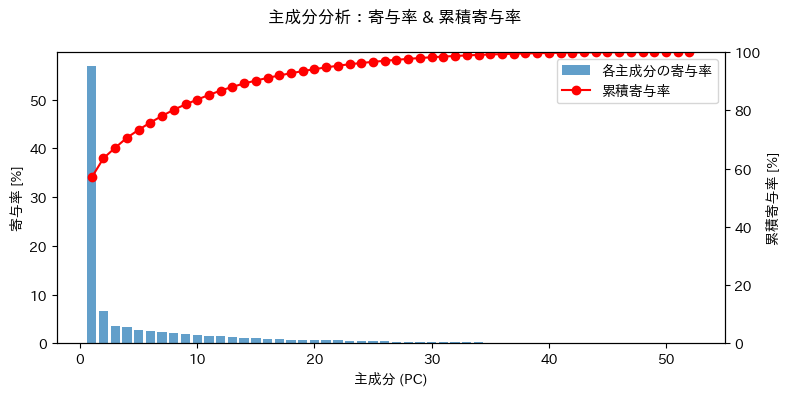

In [23]:
pipe_full = make_pipeline(
    SimpleImputer(strategy="mean"),
    StandardScaler(),
    PCA(n_components=None, random_state=0)
)
pipe_full.fit(brand_attr.values)

pca_full        = pipe_full.named_steps["pca"]
exp_var_ratio   = pca_full.explained_variance_ratio_
cum_exp_var     = exp_var_ratio.cumsum()

pc_idx = np.arange(1, len(exp_var_ratio) + 1)

fig, ax1 = plt.subplots(figsize=(8, 4))

ax1.bar(pc_idx, exp_var_ratio * 100, alpha=0.7, label="各主成分の寄与率")
ax1.set_ylabel("寄与率 [%]")
ax1.set_xlabel("主成分 (PC)")

#for x, y in zip(pc_idx, exp_var_ratio * 100):
#    ax1.text(x, y + 0.5, f"{y:.1f}%", ha="center", va="bottom", fontsize=9)

ax2 = ax1.twinx()
ax2.plot(pc_idx, cum_exp_var * 100, color="red", marker="o", label="累積寄与率")
ax2.set_ylabel("累積寄与率 [%]")
ax2.set_ylim(0, 100)

#for x, y in zip(pc_idx, cum_exp_var * 100):
#    ax2.text(x, y + 0.5, f"{y:.1f}%", ha="center", va="bottom", color="red", fontsize=9)

fig.suptitle("主成分分析：寄与率 & 累積寄与率")
fig.legend(loc="upper right", bbox_to_anchor=(1, 1), bbox_transform=ax1.transAxes)
fig.tight_layout()
plt.show()

In [27]:
exp_var_ratio 

array([5.69682095e-01, 6.57319114e-02, 3.58942536e-02, 3.42962583e-02,
       2.72682579e-02, 2.50913681e-02, 2.26059881e-02, 2.13180836e-02,
       1.81720724e-02, 1.65944214e-02, 1.59520734e-02, 1.49689566e-02,
       1.27262082e-02, 1.16931230e-02, 9.86774863e-03, 9.25663981e-03,
       8.36241829e-03, 7.71657036e-03, 7.10716387e-03, 6.85097553e-03,
       5.99455710e-03, 5.86808356e-03, 4.82990566e-03, 4.47605800e-03,
       3.88779790e-03, 3.70199538e-03, 3.35444764e-03, 3.13198288e-03,
       2.96091347e-03, 2.61821500e-03, 2.32905481e-03, 2.09812843e-03,
       1.85529306e-03, 1.76603260e-03, 1.46078378e-03, 1.39319658e-03,
       1.20341160e-03, 1.01142714e-03, 8.43109968e-04, 7.49256025e-04,
       7.04552706e-04, 5.73400082e-04, 5.13882134e-04, 3.73738318e-04,
       3.20229313e-04, 2.67756398e-04, 2.05414603e-04, 1.97914223e-04,
       7.50548001e-05, 6.56361382e-05, 1.21832380e-05, 5.08704763e-33])

In [32]:
from tabulate import tabulate

attr_load = (
    loadings                           # 40×4  (Brand, Attribute, PC1, PC2)
      .groupby("Attribute")[["PC1", "PC2"]]   # 数値列だけ抽出
      .apply(lambda df: df.abs().mean())      # 寄与度＝絶対値 → ブランド平均
      .rename(columns={"PC1": "PC1 寄与度",
                       "PC2": "PC2 寄与度"})
      .sort_values("PC1 寄与度", ascending=False)
      .round(3)
)

print(tabulate(attr_load, headers="keys", tablefmt="github"))

| Attribute        |   PC1 寄与度 |   PC2 寄与度 |
|------------------|--------------|--------------|
| 品質が良い       |        0.148 |        0.088 |
| 性能が優れている |        0.147 |        0.078 |
| 信頼できる       |        0.146 |        0.085 |
| 先進性がある     |        0.134 |        0.072 |
| 洗練されてる     |        0.132 |        0.106 |
| シンプルである   |        0.13  |        0.055 |
| 親しみやすい     |        0.12  |        0.122 |
| デザインが良い   |        0.119 |        0.145 |
| 都会的である     |        0.105 |        0.149 |
| 個性的である     |        0.091 |        0.181 |
